In [ ]:
import pandas as pd
import numbers as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


-- replace Totalchages null value into 0 and type str/obj into float --

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Find total Duplicated value
df.duplicated().sum()
# Find duplicate value in primary key (Imp step)
df["customerID"].duplicated().sum()

np.int64(0)

-- Replace SeniorCitizen value 0 and 1 into Yes/No for easy to read everyone --

In [23]:
def conv(values):
    if values == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


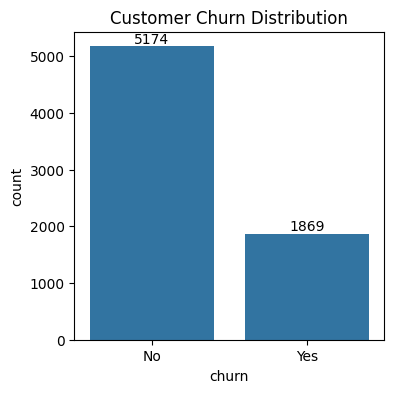

In [42]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x="churn", data=df)
ax.bar_label(ax.containers[0])
plt.title("Customer Churn Distribution")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

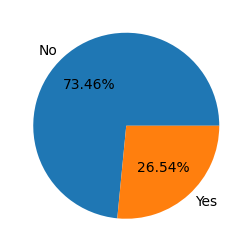

In [43]:
plt.figure(figsize= (3,4))
gb = df.groupby("churn").agg({"churn":"count"})
plt.pie(gb["churn"], labels= gb.index, autopct= "%1.2f%%")
plt.show

--From the given pie chart we can conclude that 26.54% of our customers have churned out.--

__Now let's explore the reason behind it__

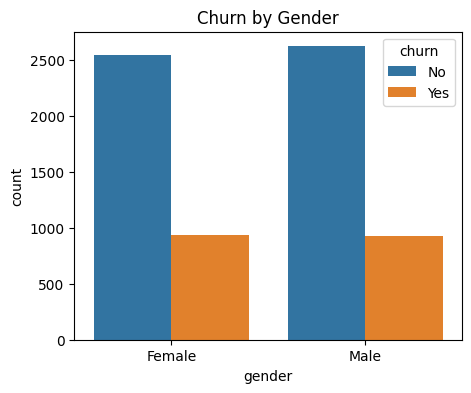

In [48]:
plt.figure(figsize= (5,4))
sns.countplot( x = "gender", data=df, hue= "churn")
plt.title("Churn by Gender")
plt.show()

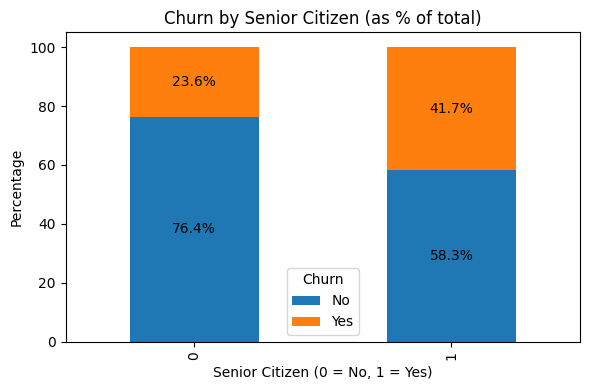

In [80]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Crosstab: Churn vs SeniorCitizen
ct = pd.crosstab(df['seniorcitizen'], df['churn'])

# Convert counts to row-wise percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Define custom colors (optional: Yes = orange, No = gray)
# colors = ['gray', 'orange'] if 'no' in ct.columns.str.lower().tolist() else ['orange', 'gray']

# Plot stacked percentage bar chart
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(6, 4))

# Add % labels inside bars
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=10, color='black'
            )

# Set labels and title
plt.title("Churn by Senior Citizen (as % of total)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

--Comparative a greated percentage of people in senoir catizion category have chure--

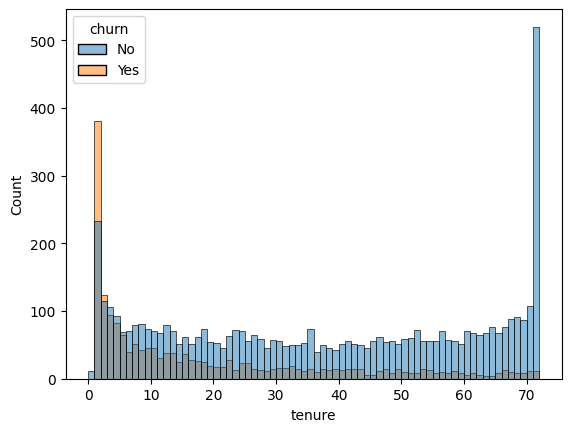

In [67]:
plt.Figure(figsize=(9,4))
sns.histplot(x= "tenure", data= df, bins= 72, hue= "churn")
plt.show()

-- People who have used our service for a long time have stayed and people eho have used our service # 1 or 2 months 
   have chure --

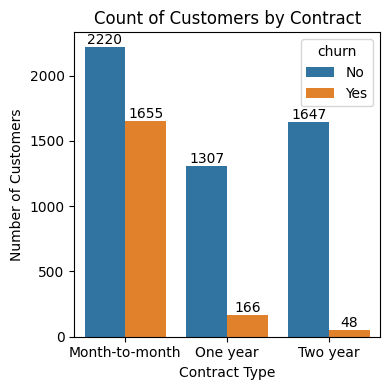

In [72]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="contract", data=df, hue="churn")

# Add labels on both bar segments
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Customers by Contract")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

-- People who have month to month contract are likly to churn then from those who have 1 or 2 year contract--

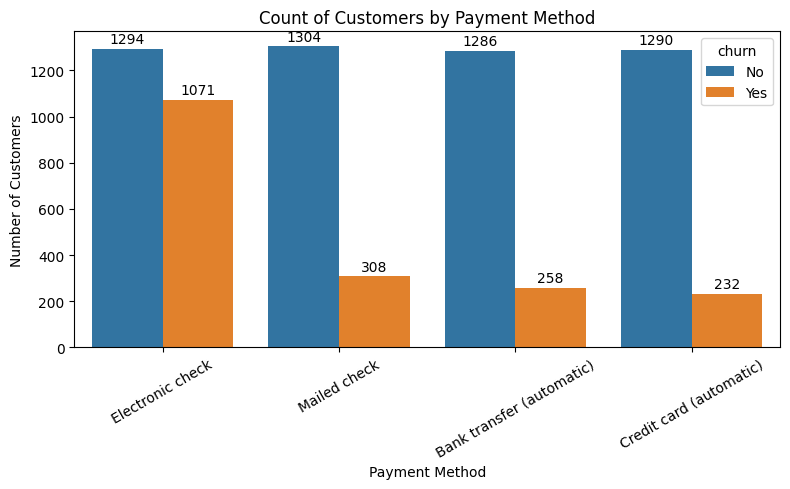

In [74]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

plt.figure(figsize=(8, 5))  # Slightly wider for long payment method names
ax = sns.countplot(x="paymentmethod", data=df, hue="churn")

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

# Beautify the chart
plt.title("Count of Customers by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)  # Rotate for better visibility
plt.tight_layout()
plt.show()

--Customer is likly to chure when he is using electronic check as a payment method--

<Figure size 300x400 with 0 Axes>

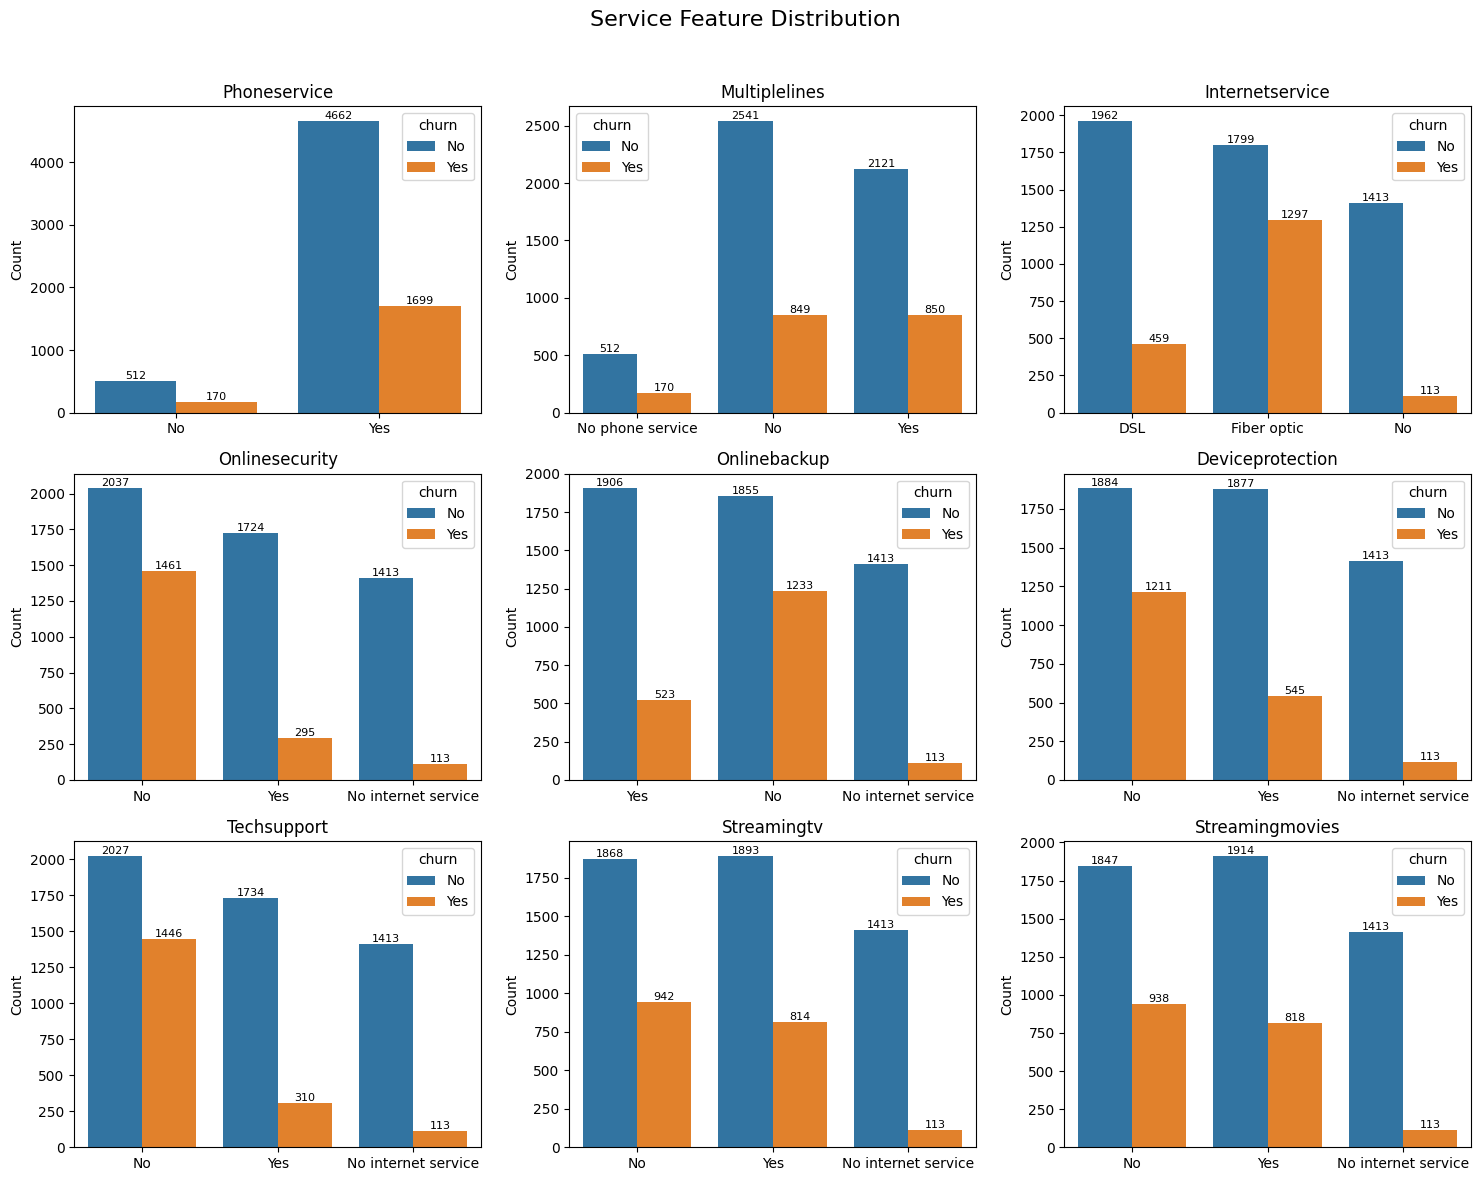

In [77]:
plt.figure(figsize= (3,4))
service_cols = [
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies'
]

# Clean column names if not already done
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Set up the subplot grid (3 rows, 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Service Feature Distribution', fontsize=16)

# Flatten axes array for easy looping
axes = axes.flatten()

# Loop through columns and create countplots
for i, col in enumerate(service_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue= "churn")
    axes[i].set_title(f'{col.capitalize()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

-- Customers who lacked security-related services (like OnlineSecurity, TechSupport, DeviceProtection) had noticeably higher churn rates. Those with Fiber optic internet also showed higher churn compared to DSL users. In general, services like StreamingTV and StreamingMovies had slightly higher churn among users who opted in, suggesting that value-added services alone don't prevent churn unless core support features are in place.--